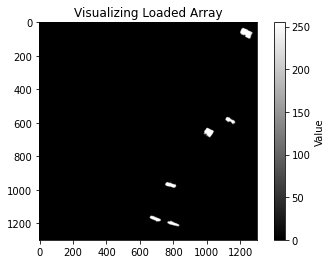

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load the array from the file
loaded_array = np.load('array_pera.npy')

# Visualize the array
plt.imshow(loaded_array, cmap='gray')
plt.colorbar(label='Value')
plt.title('Visualizing Loaded Array')
plt.show()

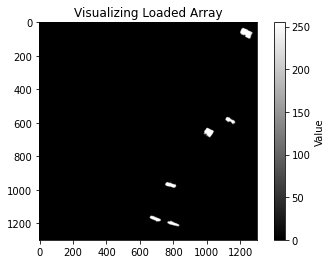

In [13]:

# Load the array from the file
loaded_array = np.load('array_pera_open.npy')

# Visualize the array
plt.imshow(loaded_array, cmap='gray')
plt.colorbar(label='Value')
plt.title('Visualizing Loaded Array')
plt.show()


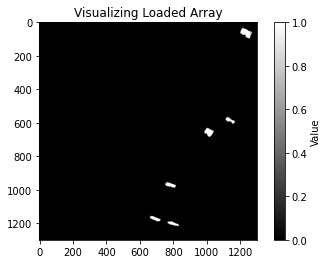

In [16]:
# Load the array from the file
loaded_array = np.load('array_pera_intersect.npy')

# Visualize the array
plt.imshow(loaded_array, cmap='gray')
plt.colorbar(label='Value')
plt.title('Visualizing Loaded Array')
plt.show()

In [15]:
from skimage import measure
import numpy as np

# binary image with two labeled regions
image = np.array([[0, 0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0],
                  [0, 0, 2, 2, 0, 0],
                  [0, 0, 2, 2, 0, 0]])

# compute properties of labeled regions
properties = measure.regionprops(image)

for prop in properties:
    print(f"Region {prop.label}:")
    print(f" - Area: {prop.area}")
    print(f" - Centroid: {prop.centroid}")
    print(f" - Bounding box: {prop.bbox}")




Region 1:
 - Area: 5
 - Centroid: (0.4, 2.8)
 - Bounding box: (0, 2, 2, 5)
Region 2:
 - Area: 4
 - Centroid: (3.5, 2.5)
 - Bounding box: (3, 2, 5, 4)


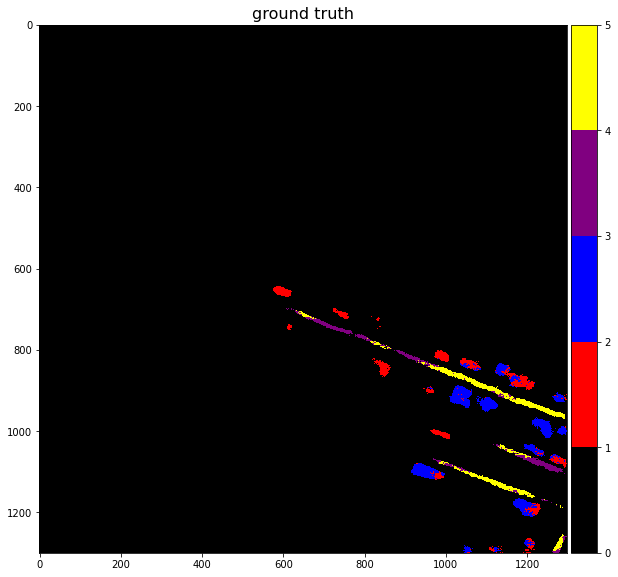

In [44]:
from osgeo import gdal, ogr, osr
import os
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# this doens't work, better just reuse SN8Dataset 
# flood_ds = gdal.Open('/tmp/share/data/spacenet8/Louisiana-East_Training_Public/annotations/masks/flood_10300100AF395C00_2_13_45.tif')

flood_ds = gdal.Open('/tmp/share/runs/spacenet8/nenad/flood/resnet34_siamese_lr1.00e-04_bs2_11-05-2023-10-48/tiffs/10300100AF395C00_2_13_45_floodpred.tif')
flood_arr = flood_ds.ReadAsArray()  # this gets the flood predictions

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.set_title("ground truth", fontsize=16)

combined_mask_cmap = colors.ListedColormap(['black', 'red', 'blue', 'purple', 'yellow'])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

img = ax.imshow(flood_arr,
          interpolation='nearest', origin='upper',
          cmap=combined_mask_cmap,
          norm=colors.BoundaryNorm([0, 1, 2, 3, 4, 5], combined_mask_cmap.N))
# fig.colorbar(flood_arr, cax=cax, orientation='vertical')
fig.colorbar(img, cax=cax, orientation='vertical')
        
plt.show()

